In [1]:
using Revise

In [2]:
using MeshCatMechanisms
using MeshCat
using RigidBodyDynamics
using Flux
using ProgressMeter
using MLDataPattern
using JLD2
using Plots; gr()
using LCPSim
using LearningMPC
using LearningMPC.Models

ArgumentError: Module Hiccup not found in current path.
Run `Pkg.add("Hiccup")` to install the Hiccup package.


In [3]:
robot = Hopper()
mvis = MechanismVisualizer(robot)
IJuliaCell(mvis)

Listening on 127.0.0.1:7000...
zmq_url=tcp://127.0.0.1:6000
web_url=http://127.0.0.1:7000/static/


MeshCat.IJuliaCell(MeshCat.ViewerWindow(ZMQ.Context(Ptr{Void} @0x0000000007642860, ZMQ.Socket[ZMQ.Socket(Ptr{Void} @0x00000000078514a0, Base.Filesystem._FDWatcher(Ptr{Void} @0x0000000007907080, 55, (1, 0), Condition(Any[]), (false, false), 0))]), ZMQ.Socket(Ptr{Void} @0x00000000078514a0, Base.Filesystem._FDWatcher(Ptr{Void} @0x0000000007907080, 55, (1, 0), Condition(Any[]), (false, false), 0)), "http://127.0.0.1:7000/static/", "tcp://127.0.0.1:6000", MeshCat.ZMQServer.ZMQWebSocketBridge(ip"127.0.0.1", Set{WebSockets.WebSocket}(), MeshCat.SceneTrees.SceneNode(Nullable{Array{UInt8,1}}(), Nullable{Array{UInt8,1}}(), Dict("meshcat"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0xa8, 0x2f, 0x6d, 0x65, 0x73, 0x68, 0x63, 0x61, 0x74], Dict("world"=>MeshCat.SceneTrees.SceneNode(#NULL, #NULL, Dict("floor"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x6f, 0x72, 0x6c, 0x64, 0x2f, 0x66, 0x6c, 0x6f, 0x6f, 0x72], Dict("floor"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x6c, 0x6f, 0x6f, 0x72, 0x2f, 0x66, 0x6c, 0x6f, 0x6f, 0x72], Dict("geometry_1"=>MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31], Dict{String,MeshCat.SceneTrees.SceneNode}()))),"core"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x66, 0x6c, 0x6f, 0x6f, 0x72, 0x2f, 0x63, 0x6f, 0x72, 0x65], Dict("after_base_z"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x74, 0x65, 0x72, 0x5f, 0x62, 0x61, 0x73, 0x65, 0x5f, 0x7a], Dict("geometry_2"=>MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x32], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x32], Dict{String,MeshCat.SceneTrees.SceneNode}()))),"foot"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x2f, 0x63, 0x6f, 0x72, 0x65, 0x2f, 0x66, 0x6f, 0x6f, 0x74], Dict("after_foot_extension"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x5f, 0x65, 0x78, 0x74, 0x65, 0x6e, 0x73, 0x69, 0x6f, 0x6e], Dict("geometry_3"=>MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x33], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x33], Dict{String,MeshCat.SceneTrees.SceneNode}()))))))))))))))), 7000, HttpServer.Server(HttpServer.HttpHandler(MeshCat.ZMQServer.handle_file_request, Base.TCPServer(RawFD(41) active), Dict{String,Function}(Pair{String,Function}("error", HttpServer.#1),Pair{String,Function}("listen", HttpServer.#3))), WebSockets.WebSocketHandler(MeshCat.ZMQServer.#5)), ZMQ.Context(Ptr{Void} @0x0000000007934f50, ZMQ.Socket[ZMQ.Socket(Ptr{Void} @0x0000000007779c00, Base.Filesystem._FDWatcher(Ptr{Void} @0x00000000079412f0, 48, (1, 0), Condition(Any[Task (runnable) @0x00007f87d8f4d7b0]), (true, false), 0))]), ZMQ.Socket(Ptr{Void} @0x0000000007779c00, Base.Filesystem._FDWatcher(Ptr{Void} @0x00000000079412f0, 48, (1, 0), Condition(Any[Task (runnable) @0x00007f87d8f4d7b0]), (true, false), 0)), "tcp://127.0.0.1:6000")), false)

In [4]:
params = MPCParams(robot)
lqrsol = LQRSolution(robot, params)
net, loss = LearningMPC.interval_net([4, 32, 32, 1])
optimizer = Flux.ADAM(Flux.params(net))

net_cost = LearningMPC.LearnedCost(lqrsol, net)

net_mpc_params = MPCParams(robot)
net_mpc_params.horizon = 1
net_mpc_controller = MPCController(robot, net_mpc_params, net_cost, [lqrsol]);

full_mpc_controller = MPCController(robot, params, lqrsol, [lqrsol, net_mpc_controller]);

In [5]:
sample_sink = LearningMPC.MPCSampleSink{Float64}(true)
playback_sink = LearningMPC.PlaybackSink(mvis, params.Δt)

full_mpc_controller.callback = LearningMPC.call_each(
    sample_sink,
#     playback_sink,
)

live_viewer = LearningMPC.live_viewer(mvis)

dagger_controller = LearningMPC.call_each(
    LearningMPC.dagger_controller(
        full_mpc_controller,
        net_mpc_controller,
        0.2),
    live_viewer
    )

dataset = LearningMPC.Dataset(lqrsol)

x_init = nominal_state(robot)
set_configuration!(x_init, [1, 1])

function collect_into!(data::Vector{<:LearningMPC.Sample})
    empty!(sample_sink)
    LearningMPC.randomize!(x0, x_init, 0.0, 1.5)
    results = LCPSim.simulate(x0, 
        dagger_controller,
        robot.environment, params.Δt, 100, 
        params.lcp_solver;
        termination=x -> configuration(x)[2] > π/2 || configuration(x)[2] < -π/2);
    append!(data, sample_sink.samples)
end

x0 = MechanismState{Float64}(robot.mechanism)

features(s::LearningMPC.Sample) = (s.state, s.mip.objective_bound, s.mip.objective_value)

features (generic function with 1 method)

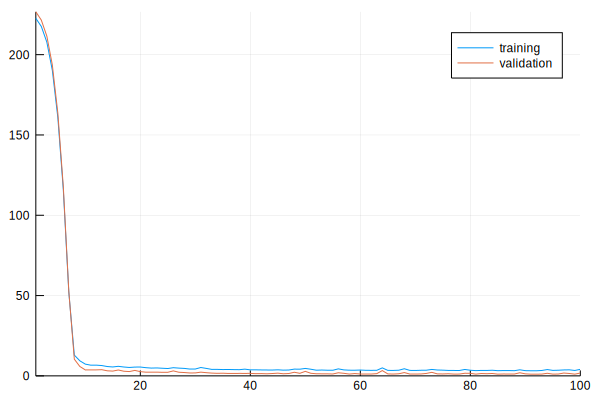

  3.853346 seconds (3.51 M allocations: 210.473 MiB, 2.70% gc time)


Progress:   2%|█                                        |  ETA: 0:34:51

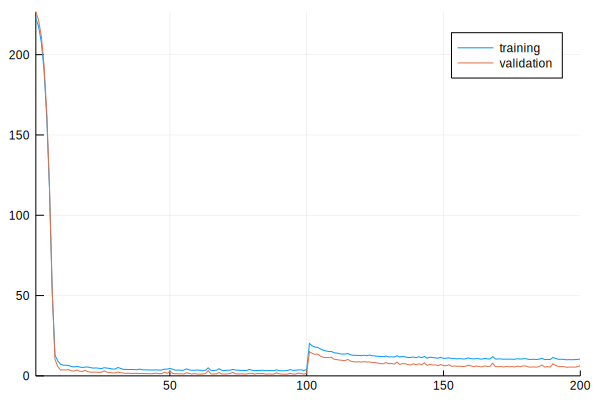

  3.776152 seconds (4.62 M allocations: 300.187 MiB, 3.00% gc time)


Progress:   4%|██                                       |  ETA: 0:23:14

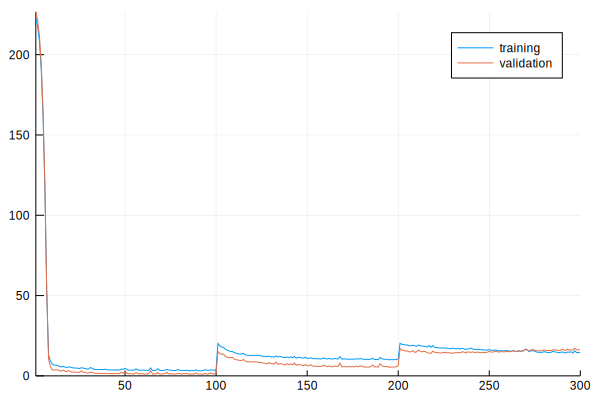

  5.130727 seconds (6.36 M allocations: 414.328 MiB, 3.29% gc time)


Progress:   6%|██                                       |  ETA: 0:19:00

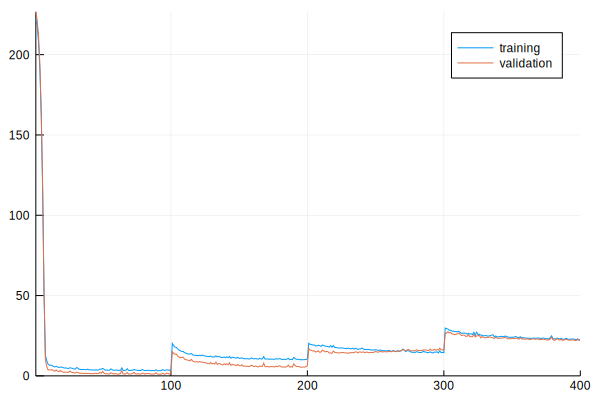

  7.625297 seconds (9.32 M allocations: 605.740 MiB, 3.24% gc time)


Progress:   8%|███                                      |  ETA: 0:17:47

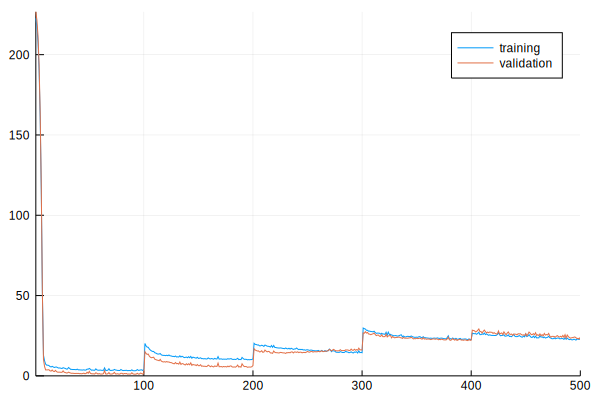

  9.307984 seconds (11.60 M allocations: 754.564 MiB, 3.48% gc time)


Progress:  10%|████                                     |  ETA: 0:17:16

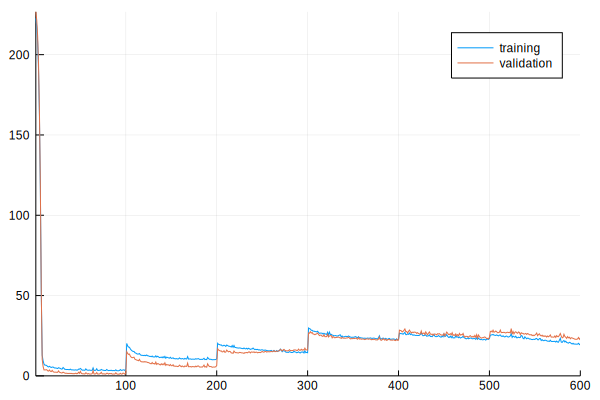

 11.705689 seconds (14.33 M allocations: 931.549 MiB, 3.42% gc time)


Progress:  12%|█████                                    |  ETA: 0:17:04

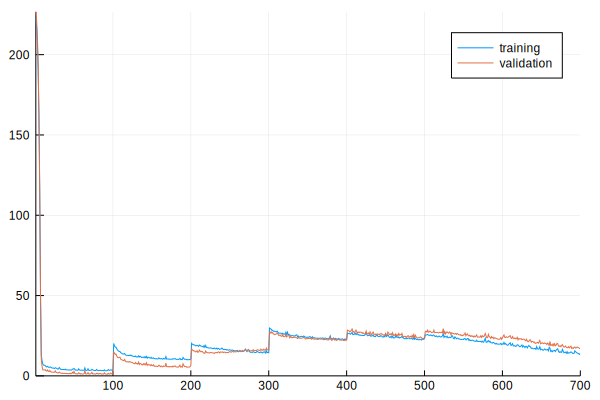

 13.901776 seconds (17.05 M allocations: 1.082 GiB, 3.57% gc time)


Progress:  14%|██████                                   |  ETA: 0:17:04

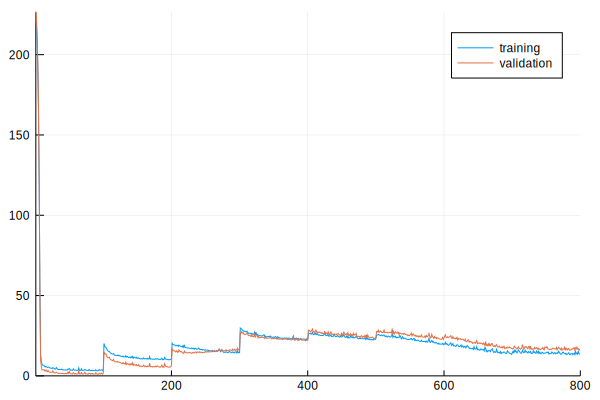

 15.717086 seconds (19.26 M allocations: 1.222 GiB, 3.51% gc time)


Progress:  16%|███████                                  |  ETA: 0:16:59

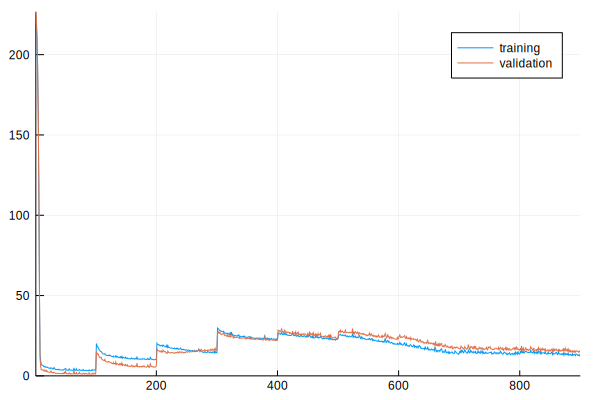

 16.910198 seconds (21.13 M allocations: 1.341 GiB, 3.55% gc time)


Progress:  18%|███████                                  |  ETA: 0:16:42

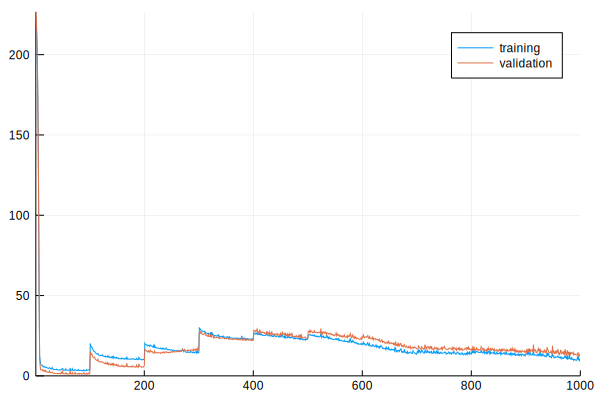

 18.917296 seconds (23.78 M allocations: 1.509 GiB, 2.85% gc time)


Progress:  20%|████████                                 |  ETA: 0:16:46

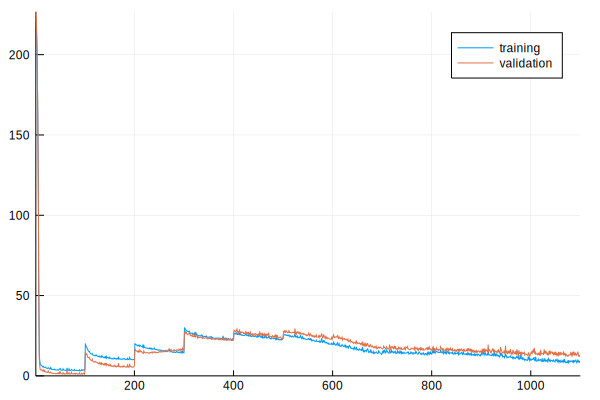

 20.522532 seconds (25.82 M allocations: 1.639 GiB, 2.95% gc time)


Progress:  22%|█████████                                |  ETA: 0:16:50

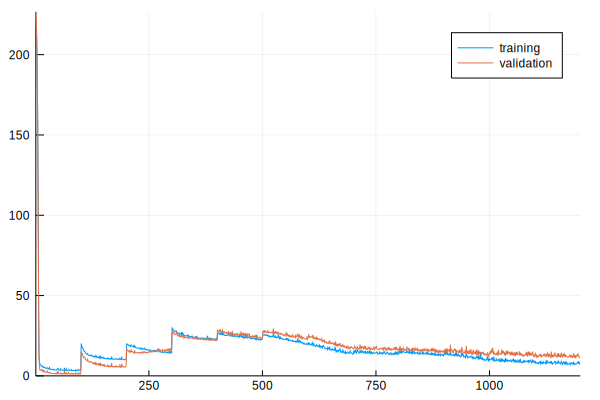

 22.593933 seconds (28.55 M allocations: 1.812 GiB, 3.01% gc time)


Progress:  24%|██████████                               |  ETA: 0:17:08

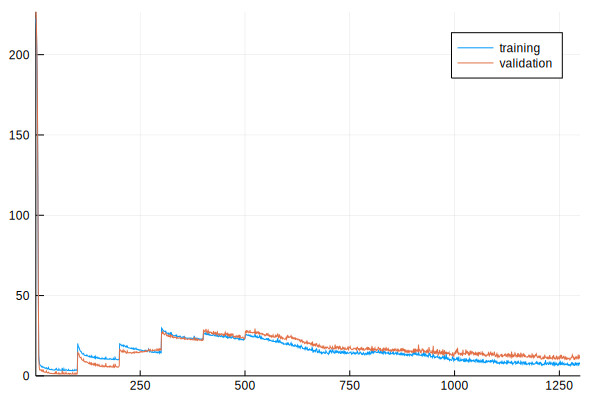

 24.901946 seconds (31.09 M allocations: 1.973 GiB, 3.06% gc time)


Progress:  26%|███████████                              |  ETA: 0:17:24

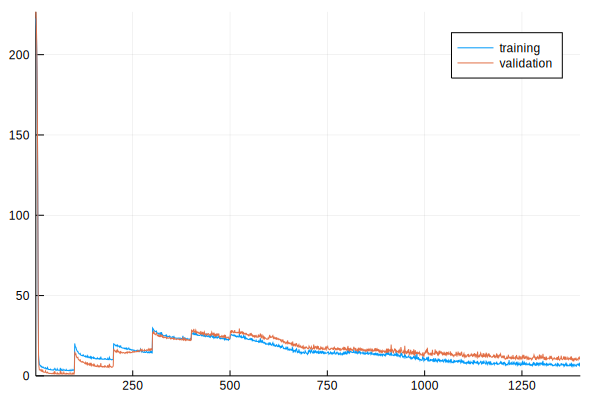

 26.997586 seconds (33.88 M allocations: 2.150 GiB, 3.10% gc time)


Progress:  28%|███████████                              |  ETA: 0:17:37

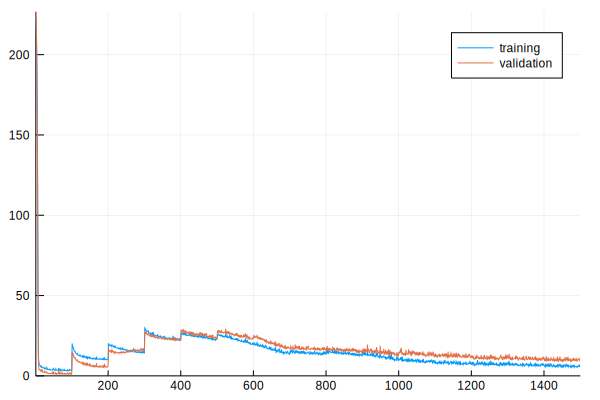

 29.400113 seconds (37.00 M allocations: 2.348 GiB, 3.23% gc time)


Progress:  30%|████████████                             |  ETA: 0:17:50

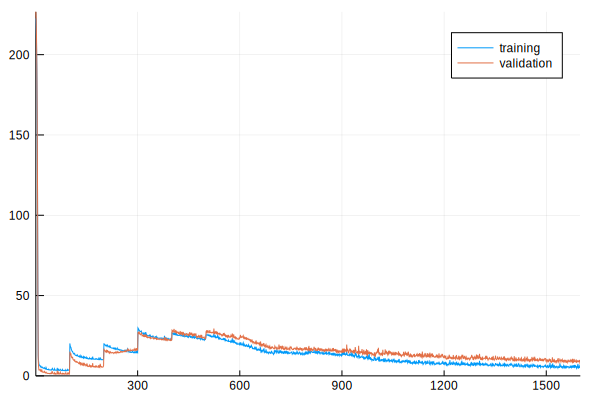

 31.206407 seconds (39.38 M allocations: 2.500 GiB, 3.29% gc time)


Progress:  32%|█████████████                            |  ETA: 0:17:58

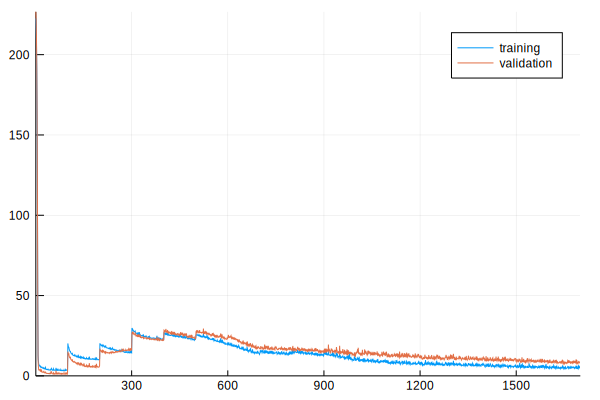

 33.269723 seconds (41.76 M allocations: 2.652 GiB, 3.38% gc time)


Progress:  34%|██████████████                           |  ETA: 0:18:05

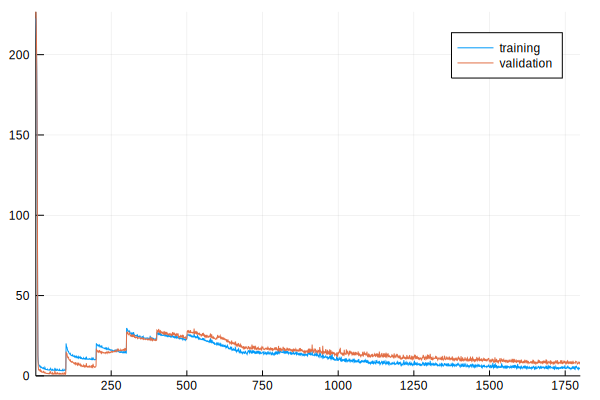

 34.811735 seconds (43.83 M allocations: 2.783 GiB, 3.43% gc time)


Progress:  36%|███████████████                          |  ETA: 0:18:05

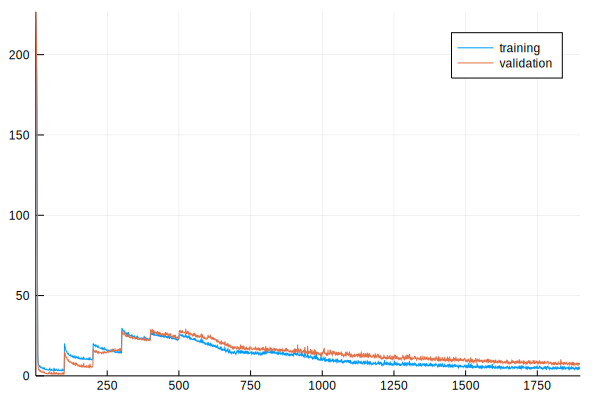

 36.786906 seconds (46.24 M allocations: 2.937 GiB, 3.45% gc time)


Progress:  38%|████████████████                         |  ETA: 0:18:05

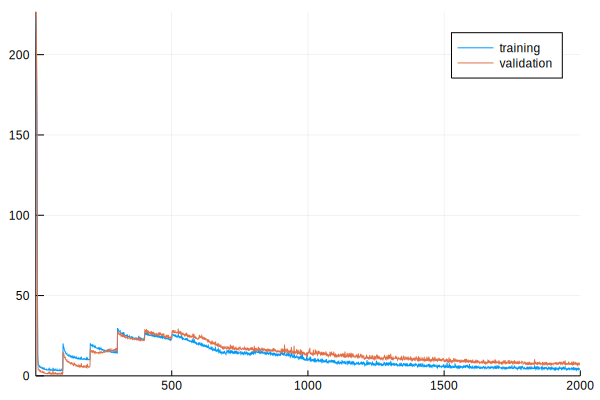

 39.272300 seconds (48.75 M allocations: 3.096 GiB, 3.49% gc time)


Progress:  40%|████████████████                         |  ETA: 0:18:06

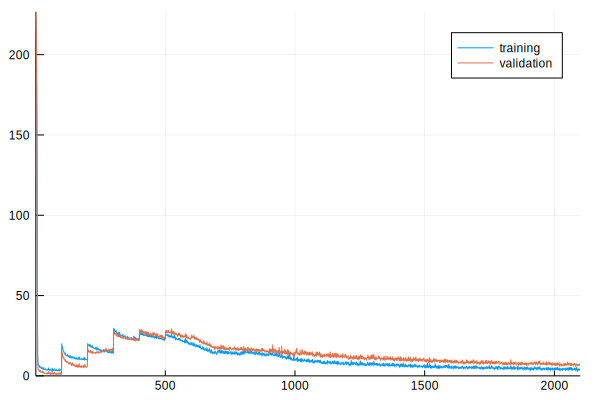

 40.840896 seconds (50.68 M allocations: 3.220 GiB, 3.51% gc time)


Progress:  42%|█████████████████                        |  ETA: 0:17:59

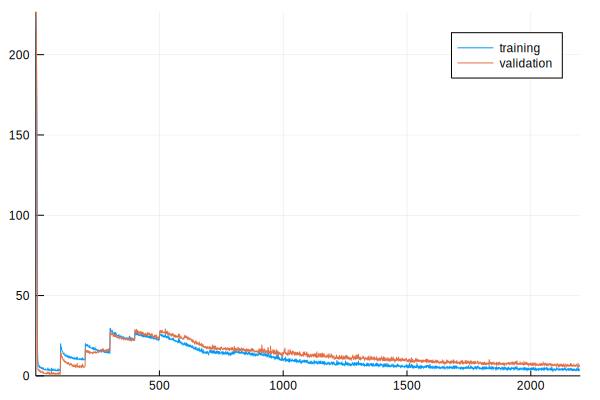

 42.876752 seconds (53.56 M allocations: 3.403 GiB, 3.54% gc time)


Progress:  44%|██████████████████                       |  ETA: 0:17:51

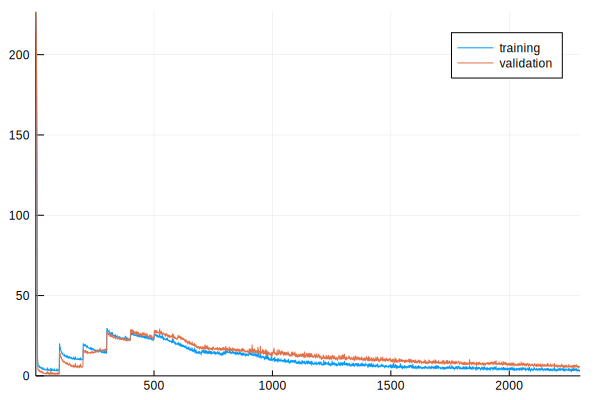

 44.924901 seconds (56.07 M allocations: 3.563 GiB, 3.55% gc time)


Progress:  46%|███████████████████                      |  ETA: 0:17:40

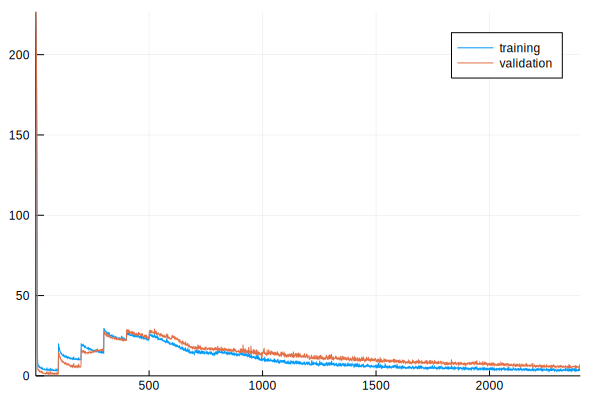

 46.740969 seconds (58.55 M allocations: 3.720 GiB, 3.64% gc time)


Progress:  48%|████████████████████                     |  ETA: 0:17:27

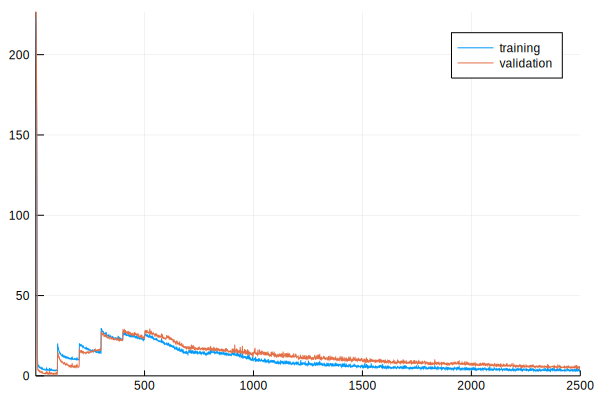

 48.688092 seconds (60.85 M allocations: 3.867 GiB, 3.63% gc time)


Progress:  50%|████████████████████                     |  ETA: 0:17:10

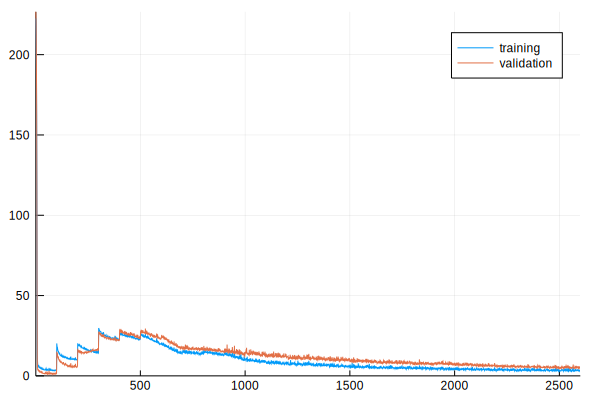

 50.450676 seconds (63.38 M allocations: 4.029 GiB, 3.66% gc time)


Progress:  52%|█████████████████████                    |  ETA: 0:16:52

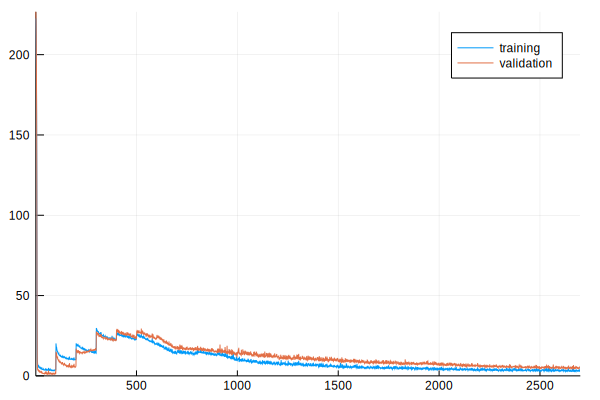

 52.275972 seconds (65.86 M allocations: 4.186 GiB, 3.68% gc time)


Progress:  54%|██████████████████████                   |  ETA: 0:16:32

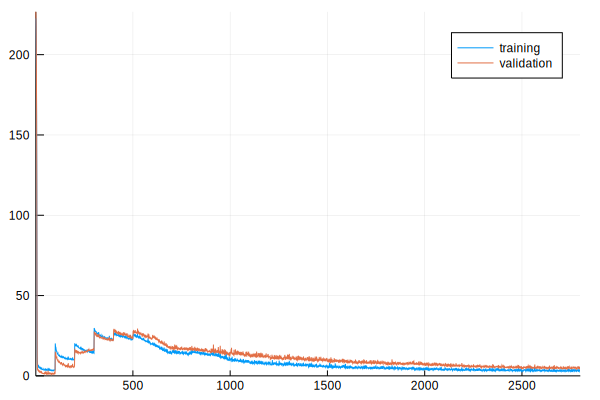

 54.528840 seconds (68.41 M allocations: 4.349 GiB, 3.67% gc time)


Progress:  56%|███████████████████████                  |  ETA: 0:16:10

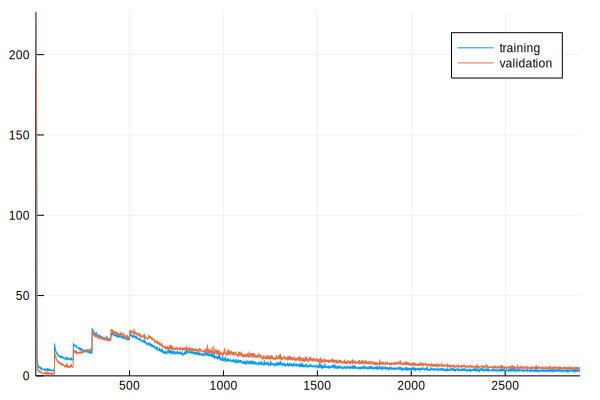

 56.488010 seconds (70.43 M allocations: 4.477 GiB, 3.67% gc time)


Progress:  58%|████████████████████████                 |  ETA: 0:15:46

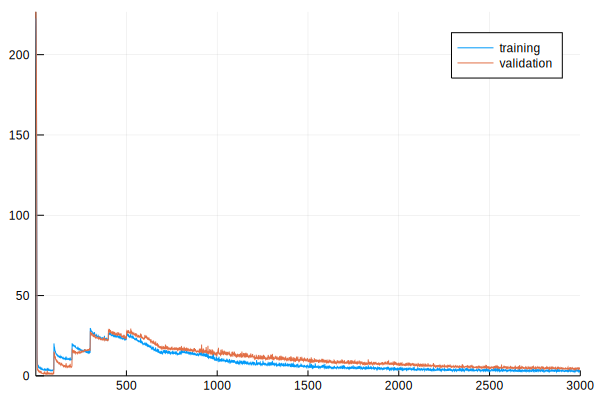

 58.506012 seconds (73.26 M allocations: 4.657 GiB, 3.67% gc time)


Progress:  60%|█████████████████████████                |  ETA: 0:15:21

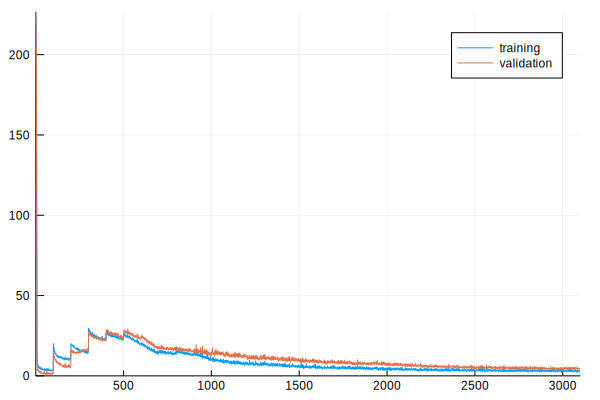

 60.257240 seconds (75.67 M allocations: 4.809 GiB, 3.69% gc time)


Progress:  62%|█████████████████████████                |  ETA: 0:14:53

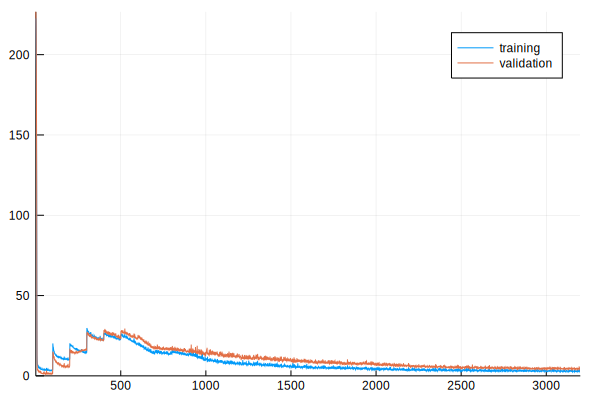

 62.300254 seconds (78.32 M allocations: 4.977 GiB, 3.72% gc time)


Progress:  64%|██████████████████████████               |  ETA: 0:14:24

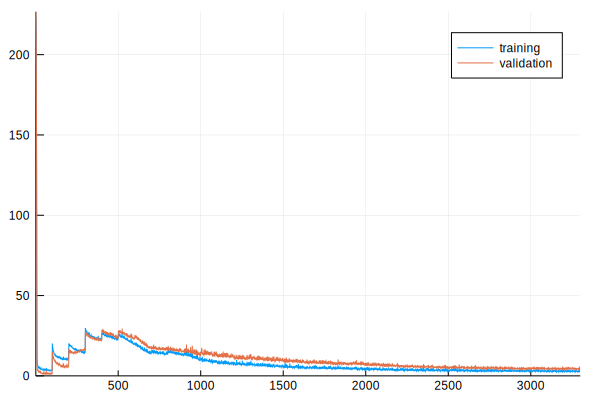

 64.804636 seconds (80.78 M allocations: 5.134 GiB, 3.69% gc time)


Progress:  66%|███████████████████████████              |  ETA: 0:13:53

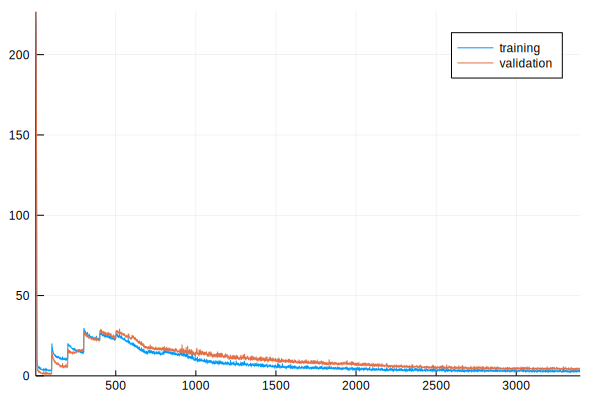

 66.274413 seconds (83.16 M allocations: 5.286 GiB, 3.71% gc time)


Progress:  68%|████████████████████████████             |  ETA: 0:13:19

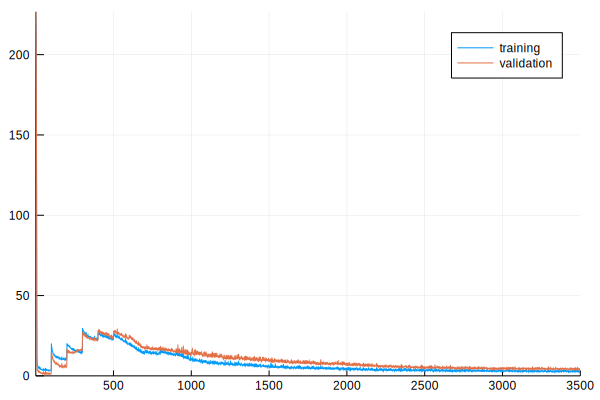

 68.410388 seconds (85.98 M allocations: 5.465 GiB, 3.72% gc time)


Progress:  70%|█████████████████████████████            |  ETA: 0:12:44

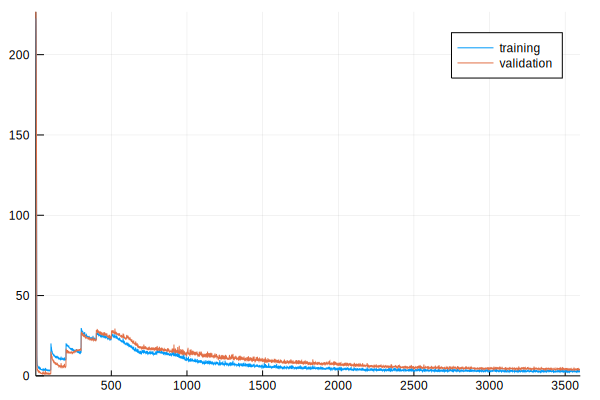

 70.654648 seconds (88.42 M allocations: 5.620 GiB, 3.73% gc time)


Progress:  72%|██████████████████████████████           |  ETA: 0:12:07

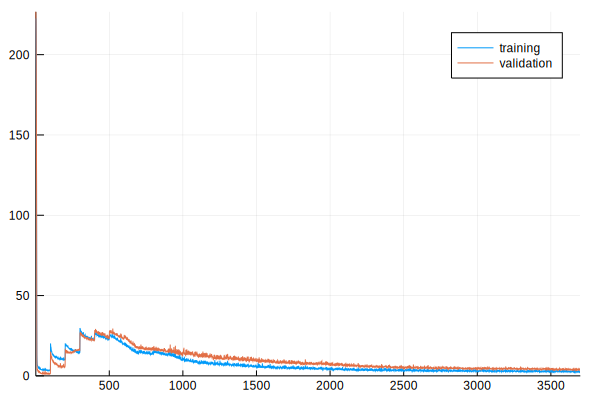

 72.848111 seconds (90.64 M allocations: 5.761 GiB, 3.71% gc time)


Progress:  74%|██████████████████████████████           |  ETA: 0:11:27

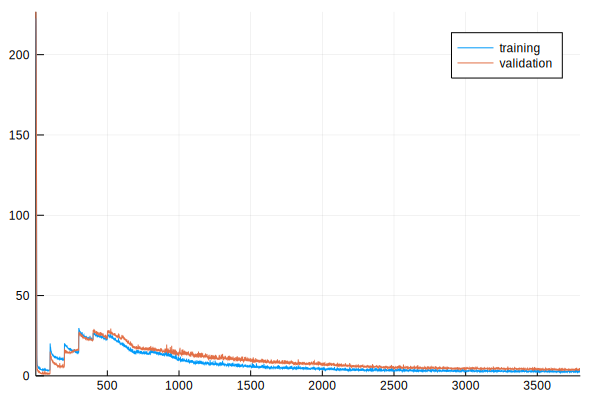

 74.173185 seconds (92.87 M allocations: 5.903 GiB, 3.73% gc time)


Progress:  76%|███████████████████████████████          |  ETA: 0:10:46

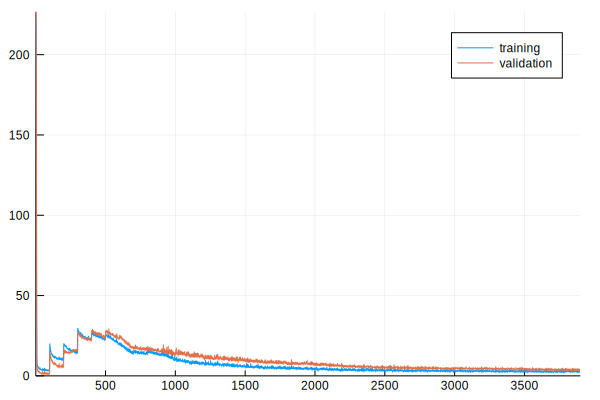

 76.324427 seconds (95.47 M allocations: 6.068 GiB, 3.71% gc time)


Progress:  78%|████████████████████████████████         |  ETA: 0:10:03

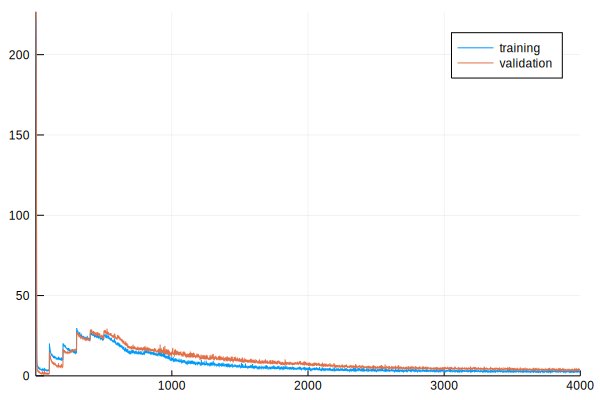

 78.375957 seconds (98.20 M allocations: 6.242 GiB, 3.73% gc time)


Progress:  80%|█████████████████████████████████        |  ETA: 0:09:18

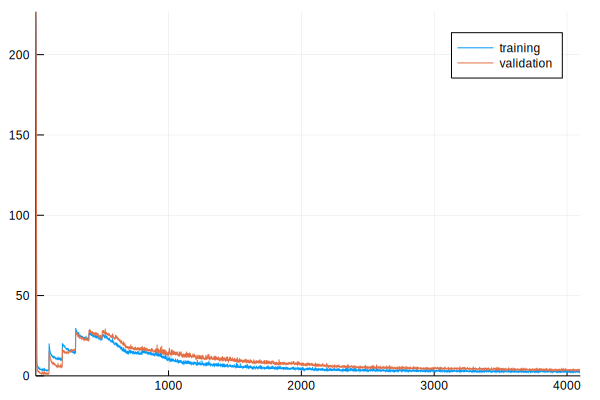

 78.757571 seconds (100.73 M allocations: 6.403 GiB, 2.52% gc time)


Progress:  82%|██████████████████████████████████       |  ETA: 0:08:31

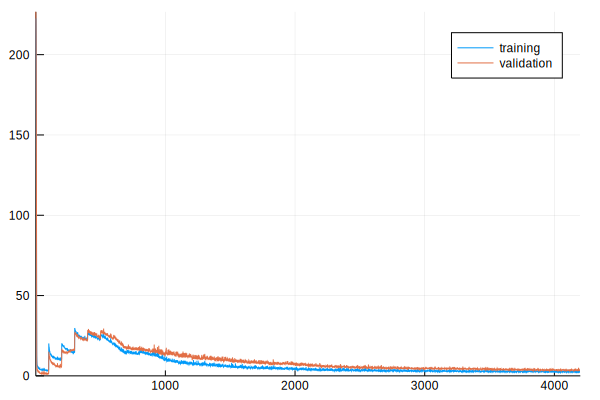

 81.288710 seconds (103.15 M allocations: 6.556 GiB, 2.60% gc time)


Progress:  84%|██████████████████████████████████       |  ETA: 0:07:42

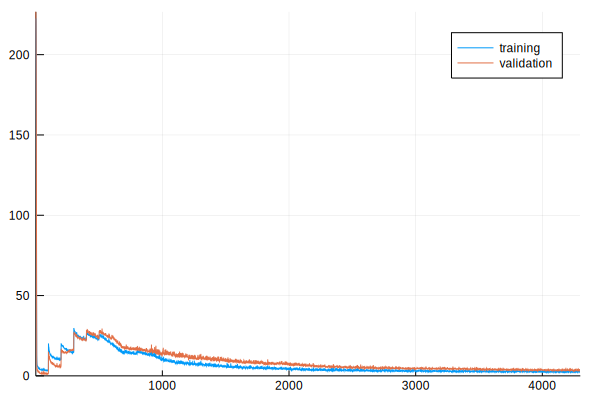

 82.555430 seconds (104.97 M allocations: 6.672 GiB, 2.71% gc time)


Progress:  86%|███████████████████████████████████      |  ETA: 0:06:50

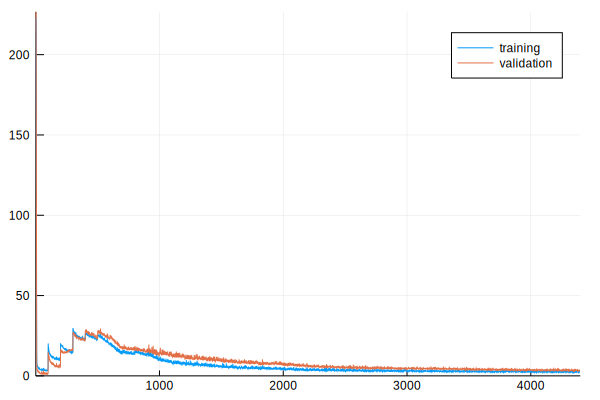

 84.143786 seconds (107.06 M allocations: 6.806 GiB, 2.80% gc time)


Progress:  88%|████████████████████████████████████     |  ETA: 0:05:57

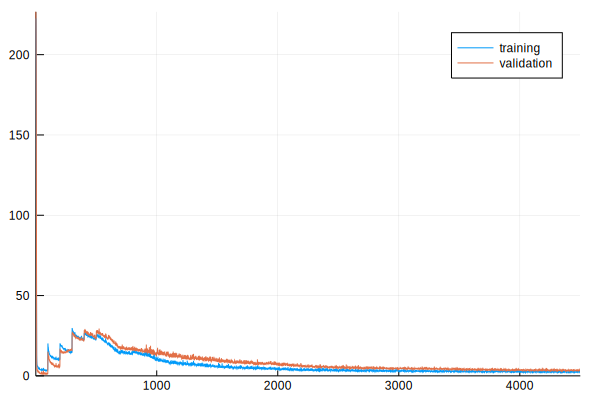

 86.602092 seconds (109.76 M allocations: 6.977 GiB, 2.90% gc time)


Progress:  90%|█████████████████████████████████████    |  ETA: 0:05:02

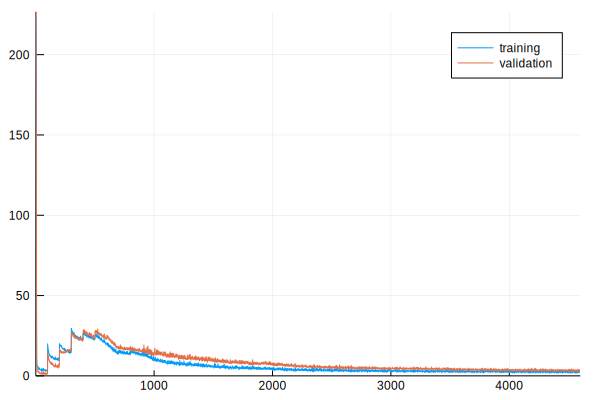

 88.936663 seconds (112.18 M allocations: 7.131 GiB, 3.01% gc time)


Progress:  92%|██████████████████████████████████████   |  ETA: 0:04:06

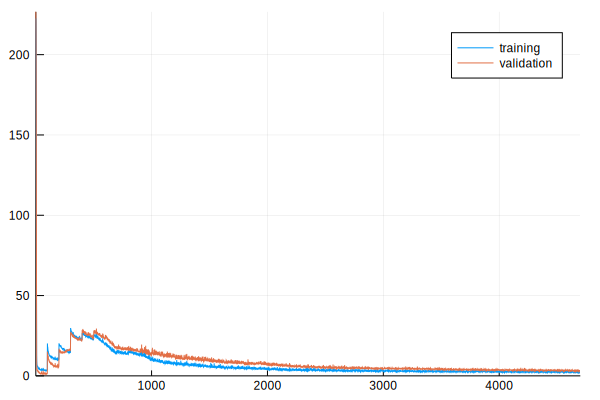

 90.270786 seconds (114.68 M allocations: 7.289 GiB, 3.12% gc time)


Progress:  94%|███████████████████████████████████████  |  ETA: 0:03:07

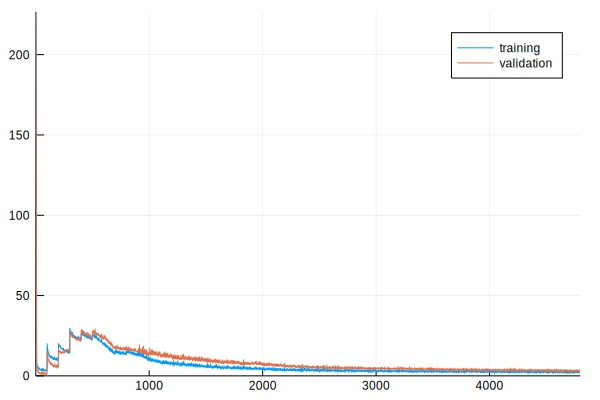

 93.416669 seconds (117.15 M allocations: 7.447 GiB, 3.18% gc time)


Progress:  96%|███████████████████████████████████████  |  ETA: 0:02:07

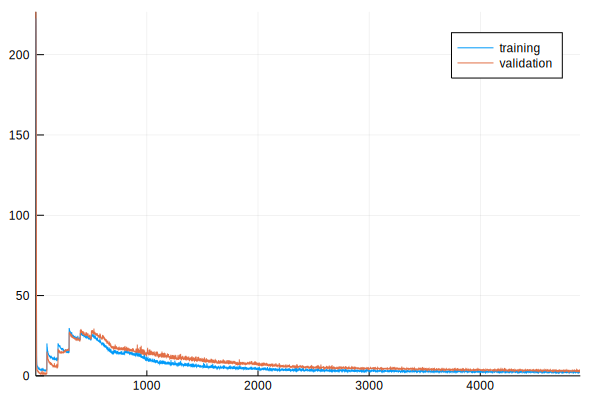

 94.489785 seconds (119.13 M allocations: 7.573 GiB, 3.26% gc time)


Progress:  98%|████████████████████████████████████████ |  ETA: 0:01:04

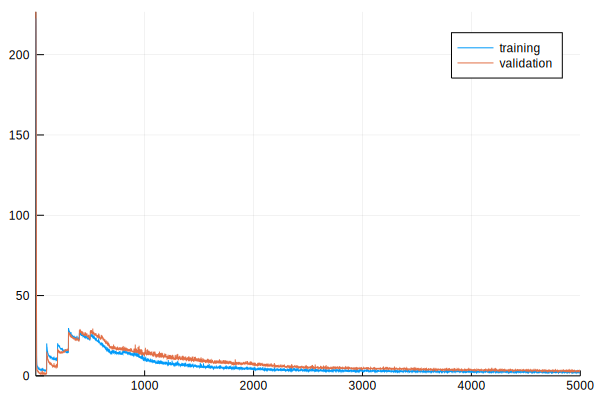

 96.734629 seconds (121.38 M allocations: 7.715 GiB, 3.34% gc time)


Progress: 100%|█████████████████████████████████████████| Time: 0:54:21


In [8]:
datasets = Vector{LearningMPC.Dataset{Float64}}()
all_training_data = Vector{Tuple{Vector{Float64}, Float64, Float64}}()
all_validation_data = Vector{Tuple{Vector{Float64}, Float64, Float64}}()
losses = Vector{Tuple{Float64, Float64}}()

@showprogress for i in 1:50
    dataset = LearningMPC.Dataset(lqrsol)
    for i in 1:2
        collect_into!(dataset.training_data)
    end
    collect_into!(dataset.testing_data)
    collect_into!(dataset.validation_data)
    append!(all_training_data, features.(dataset.training_data))
    append!(all_validation_data, features.(dataset.validation_data))
    
    @time for i in 1:100
        Flux.train!(loss, shuffleobs(all_training_data), optimizer)
        push!(losses, 
            (mean(xy -> Flux.Tracker.data(loss(xy...)), 
                  all_training_data),
             mean(xy -> Flux.Tracker.data(loss(xy...)), 
                  all_validation_data)))
    end
    push!(datasets, dataset)
    
    jldopen("hopper.jld2", "w") do file
        file["datasets"] = datasets
        file["net"] = net
        file["lqrsol"] = lqrsol
        file["mpc_params"] = Dict(
            "Δt" => params.Δt,
            "horizon" => params.horizon,
        )
        file["all_training_data"] = all_training_data
        file["all_validation_data"] = all_validation_data
        file["losses"] = losses
    end
    
    plt = plot(first.(losses), label="training")
    plot!(plt, last.(losses), label="validation")
    ylims!(plt, (0, ylims(plt)[2]))
    display(plt)
end

In [16]:
x0 = nominal_state(robot)
# LearningMPC.randomize!(x0, x_init, 0, 0.1)
# velocity(x0) .= randn(num_velocities(x0))
results = LCPSim.simulate(x0, net_mpc_controller, environment(robot), params.Δt, 100, params.lcp_solver);

In [17]:
set_configuration!(mvis, configuration(results[1].state))

In [18]:
playback(mvis, results, params.Δt)

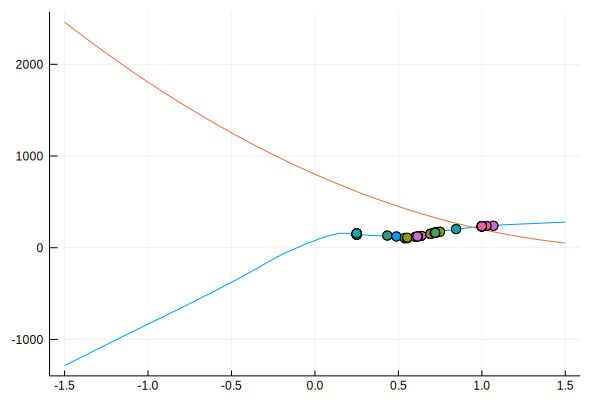

In [19]:
xx = linspace(-1.5, 1.5, 101)
plt = plot(xx, x -> Flux.Tracker.data(net([x, x, 0, 0]))[], legend=false)
plot!(plt, xx, x -> (s = [x, x, 0, 0]; (s - lqrsol.x0)' * lqrsol.S * (s - lqrsol.x0)))
for (x, lb, ub) in all_training_data
    if norm(x - [x[1], x[1], 0, 0]) < 1e-1
        plot!(plt, [x[1], x[1]], [lb, ub], marker=:dot, markersize=5)
    end
end
plt

In [19]:
x0 = nominal_state(robot)
data = map(linspace(-1.5, 1.5, 51)) do x
    set_configuration!(x0, [x, 0])
    r = LearningMPC.run_mpc(x0, environment(robot), params, lqrsol, [lqrsol])
    (x, r.mip.objective_bound, r.mip.objective_value)
end;

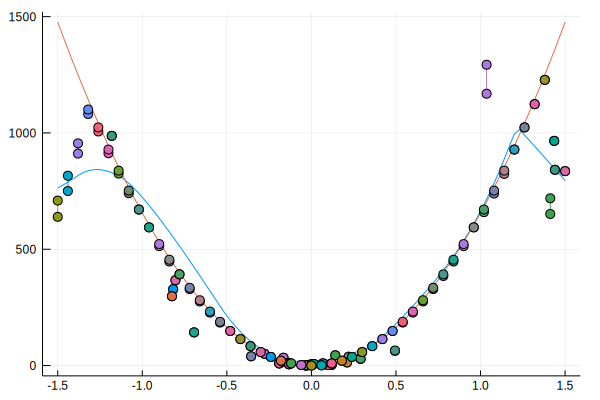

In [20]:
xx = linspace(-1.5, 1.5, 101)
plt = plot(xx, x -> Flux.Tracker.data(net([x, 0, 0, 0]))[], legend=false)
plot!(plt, xx, x -> (s = [x, 0, 0, 0]; (s - lqrsol.x0)' * lqrsol.S * (s - lqrsol.x0)))
for (x, lb, ub) in all_training_data
    if norm(x[2:end]) < 1e-1
        plot!(plt, [x[1], x[1]], [lb, ub], marker=:dot, markersize=5)
    end
end
for (x, lb, ub) in data
    plot!(plt, [x[1], x[1]], [lb, ub], marker=:dot, markersize=5)
end

plt